In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

root_path = Path("../")
data_path = root_path / "data"
figures_path = Path("figures")

In [2]:
def prepare_dataset(dataset: pd.DataFrame) -> pd.DataFrame:
    dataset = dataset[dataset.User_Score != "tbd"]
    dataset["User_Score"] = dataset["User_Score"].astype("float")
    dataset.columns = [col.lower() for col in dataset.columns]
    return dataset

In [3]:
dataset_path = data_path / "dataset.csv"
df = pd.read_csv(dataset_path)
df = prepare_dataset(df)

/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_74789/468860359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["User_Score"] = dataset["User_Score"].astype("float")


In [4]:
df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
publisher           object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
global_sales       float64
critic_score       float64
critic_count       float64
user_score         float64
user_count         float64
developer           object
rating              object
dtype: object

## Want to analyze correlation between user score and critic score

In [6]:
col1, col2 = "user_score", "critic_score"

## Just plot the needed data
By default it's line plot

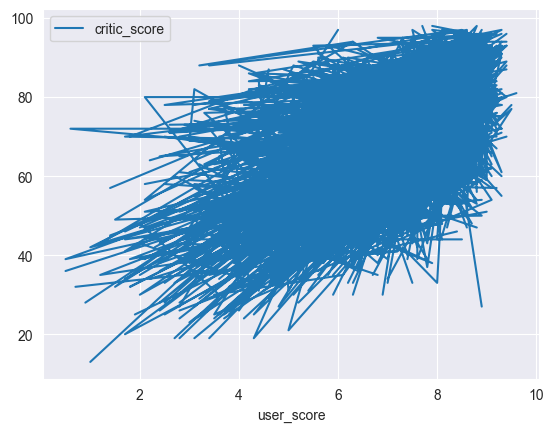

In [15]:
df.plot(
    x=col1,
    y=col2,
)

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_0.pdf",
    dpi=300,
    bbox_inches="tight",
)

As we can see it doesn't represent data quite well, so let's try to look into it using scatter plot instead

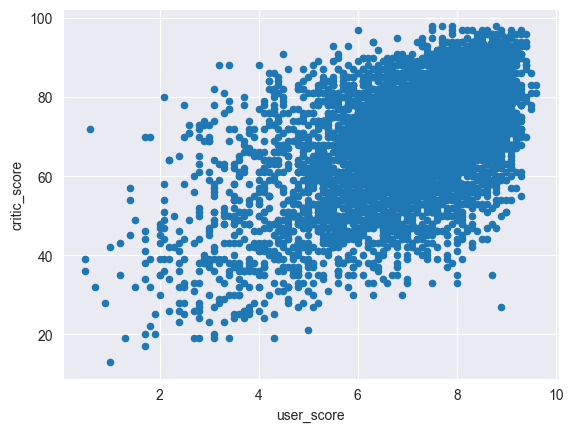

In [16]:
df.plot(
    x=col1,
    y=col2,
    kind="scatter",
);

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_1.pdf",
    dpi=300,
    bbox_inches="tight",
)

Well, it's better, but we can't understand the density of points because they are too packed.
To understand the density better, we can adjust `alpha` parameter and make it less than 1, to make more dense area less transparent

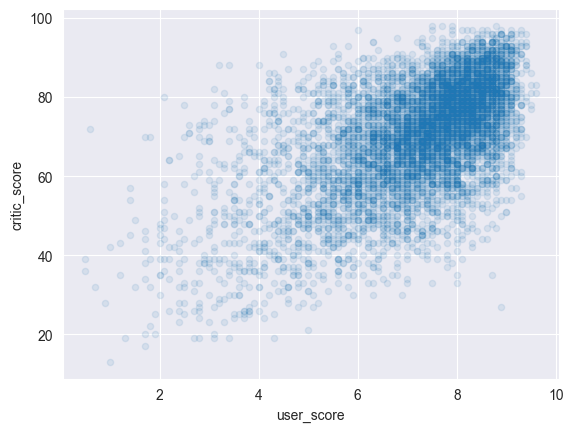

In [17]:
df.plot(
    x=col1,
    y=col2,
    kind="scatter",
    alpha=0.1,
);

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_2.pdf",
    dpi=300,
    bbox_inches="tight",
)

Much better, we can determine the big dense cluster in our dataset with this visualization. Moreover, we can determine the whole trend that there is some kind of linear dependency between two scores.
Let's make a linear approximation of the data to check it.


For that, we can use seaborn function `regplot`, which plots data and a linear regression model fit.

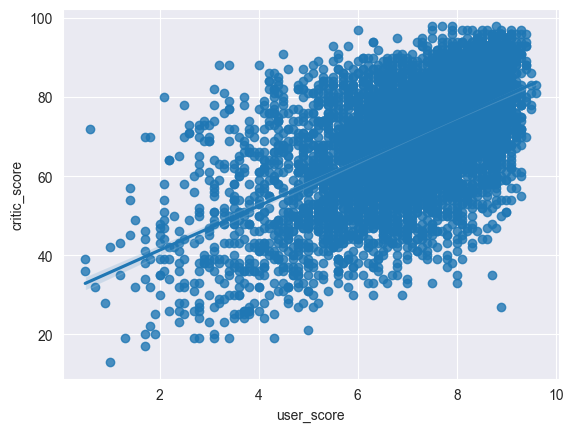

In [18]:
sns.regplot(
    x=col1,
    y=col2,
    data=df,
);

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_3.pdf",
    dpi=300,
    bbox_inches="tight",
)

The figure looks very overwhelmed at first sight and not understandable at all. Let's tune the visuzalization parameters a bit. Since in the figure above we have both scatter points and linear plot, to specify distinct paramters for each type of visualizations we should use `scatter_kws` and `line_kws` parameters

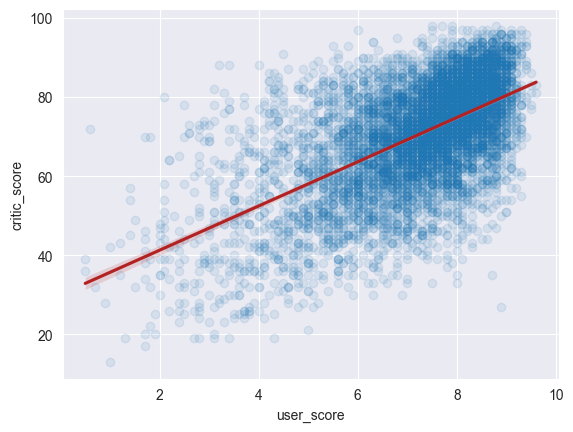

In [19]:
sns.regplot(
    x=col1,
    y=col2,
    data=df,
    scatter_kws={"alpha": 0.1},
    line_kws={"color": "firebrick"},
);

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_4.pdf",
    dpi=300,
    bbox_inches="tight",
)

All right, visually we can see that linear relationship explains our data quite well, but can we measure how actually "well" it is?

Yes, for that we can use correlation coefficients.

# Pearson And Spearman Correlations

## Pearson Correlation

Pearson correlation measures the linear relationship between two datasets. The Pearson correlation coefficient, often denoted by r, is a value between -1 and 1 that indicates the extent to which two variables are linearly related. 

The formula for Pearson correlation coefficient is defined as:

$$ r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2}}} $$

where:
- $x_i$ and $y_i$ are the individual sample points indexed with i
- $\bar{x}$ and $\bar{y}$ are the means of x and y respectively.

## Spearman Correlation

Spearman correlation, also called Spearman's rank correlation coefficient, doesn’t depend on a linear relationship. Instead, it measures the strength and direction of the monotonous relationship between two ranked variables. 

The formula for Spearman correlation is:

$$ \rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)} $$

where:
- $d_i$ is the difference between the ranks of corresponding variables
- $n$ is the total number of observations

## When To Use Each

- **Pearson Correlation**: Use Pearson correlation when you have two quantitative variables and you want to understand if there is a linear relationship between those variables.
  
- **Spearman Correlation**: Spearman correlation is more robust to outliers than Pearson correlation. Use it when you are not sure if the data follows a certain distribution, or when you have ordinal variables.

Remember, correlations do not imply causality, they just measure association between variables.

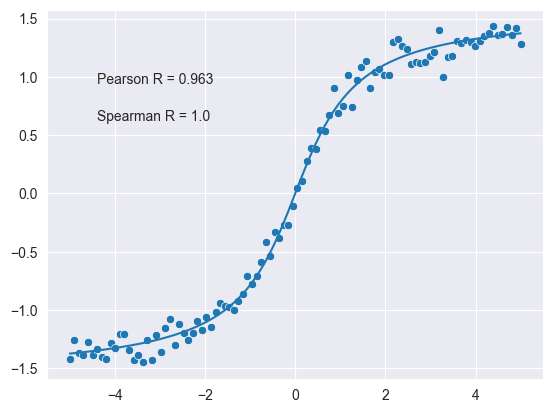

In [20]:
import scipy as sp

x = np.linspace(-5, 5, 100)
y = np.arctan(x)
y_noisy = y + np.random.randn(len(y)) / 10

sns.scatterplot(x=x, y=y_noisy)
ax = sns.lineplot(x=x, y=y)

pearson_r = np.around(sp.stats.pearsonr(x, y)[0], 3)
spearman_r = np.around(sp.stats.spearmanr(x, y)[0], 3)
ax.text(0.1, 0.8, f"Pearson R = {pearson_r}", transform=ax.transAxes)
ax.text(0.1, 0.7, f"Spearman R = {spearman_r}", transform=ax.transAxes);

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_5.pdf",
    dpi=300,
    bbox_inches="tight",
)

Let's assume that we want to determine how linearly dependent are these variables, then we should use pearson correlation coefficient. To calculate it, we can use `scipy` Python package.

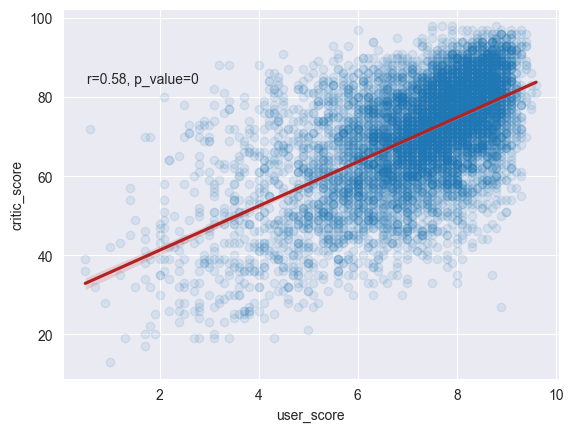

In [21]:
def get_pearson_correlation(data: pd.DataFrame, x_label: str, y_label: str) -> tuple[float, float]:
    d = data[[x_label, y_label]].dropna()
    r, p = sp.stats.pearsonr(d[x_label], d[y_label])
    return r, p


g = sns.regplot(
    x=col1,
    y=col2,
    data=df,
    scatter_kws={"alpha": 0.1},
    line_kws={"color": "firebrick"},
)
r, p = get_pearson_correlation(df, col1, col2)

g.text(
    0.05,
    0.8,
    "r={:.2f}, p_value={:.2g}".format(r, p),
    transform=g.transAxes,
);

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_6.pdf",
    dpi=300,
    bbox_inches="tight",
)

So, we can see that our variables are correlated quite well, so linear approximation could take its place

In some cases, when, for example, if we have more complex distributions, which is not quite understandable even with the figures above, we can use more advanced `seaborn` methods to deal with it. For example, in this case we could use `jointplot` to elucidate distributions by two axes in the same figure as the scattered data itself.

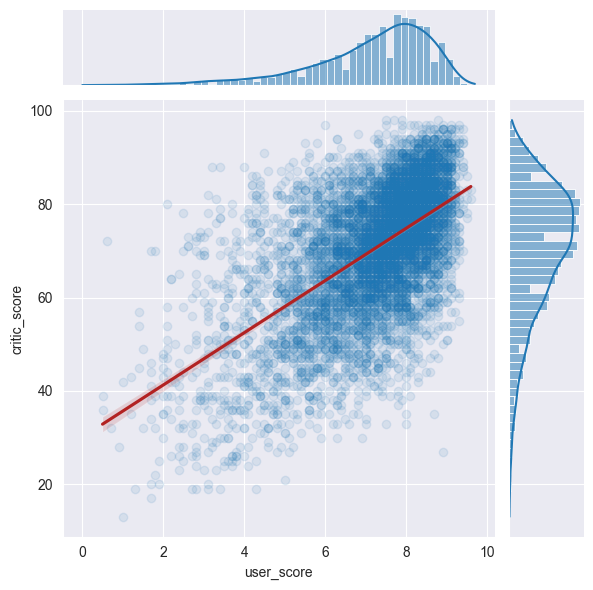

In [22]:
sns.jointplot(
    data=df,
    x=col1,
    y=col2,
    kind="reg",
    joint_kws={
        "scatter_kws": {"alpha": 0.1},
        "line_kws": {"color": "firebrick"},
    },
)

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_7.pdf",
    dpi=300,
    bbox_inches="tight",
)